In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score

from transformers import pipeline
import torch

In [2]:
classifier = pipeline ('sentiment-analysis')
type (classifier)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


transformers.pipelines.text_classification.TextClassificationPipeline

In [3]:
classifier("This is a good movie")

[{'label': 'POSITIVE', 'score': 0.9998646974563599}]

In [4]:
classifier ([
    "This was a great course ",
    "I did not understand any of it "
])

[{'label': 'POSITIVE', 'score': 0.9998300075531006},
 {'label': 'NEGATIVE', 'score': 0.9997039437294006}]

In [5]:
airline_tweets = pd.read_csv("Tweets.csv")
airline_tweets.head(5) # Top 5 row print

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [6]:
df = airline_tweets [["sentiment",'text']]
df.head(5)

,sentiment,text
0,neutral,"I`d have responded, if I were going"
1,negative,Sooo SAD I will miss you here in San Diego!!!
2,negative,my boss is bullying me...
3,negative,what interview! leave me alone
4,negative,"Sons of ****, why couldn`t they put them on t..."


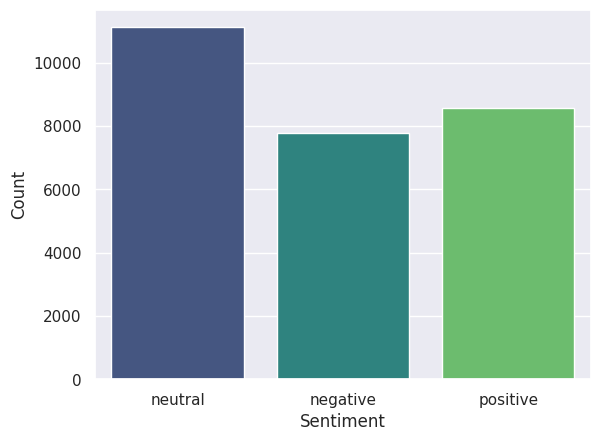

In [7]:
sns.countplot(df, x = 'sentiment', palette = "viridis");
plt.xlabel("Sentiment");
plt.ylabel("Count");
plt.show()

In [8]:
df = df[df['sentiment']!='neutral']

In [9]:
df['target'] = df['sentiment']. map({'positive':1,'negative':0})
print("number of rows:",df.shape[0])

number of rows: 16363


In [10]:
text = df['text'].tolist()
predictions = classifier(text)
predictions[:5]



[{'label': 'POSITIVE', 'score': 0.9855217337608337},
 {'label': 'NEGATIVE', 'score': 0.9993494153022766},
 {'label': 'NEGATIVE', 'score': 0.9985242486000061},
 {'label': 'NEGATIVE', 'score': 0.9981385469436646},
 {'label': 'POSITIVE', 'score': 0.9996920824050903}]

In [11]:
probs = [pred['score'] if pred['label'].startswith('p') else 1 - pred['score'] for pred in predictions]



In [12]:
preds = np.array([1 if pred['label'].startswith('p') else 0 for pred in predictions])

In [13]:
print (f"Accuracy: {round(np.mean(df['target']==preds)*100,2)}%")

Accuracy: 47.55%


In [14]:
df_clean = df.dropna(subset=['target'])
preds_clean = preds[df.index.isin(df_clean.index)]
cm = confusion_matrix(df_clean['target'], preds_clean, normalize='true')


In [15]:
print(len(df['target']), len(preds))


16363 16363


In [17]:
# Handle missing values in 'target' column before creating confusion matrix
df_clean = df.dropna(subset=['target'])
preds_clean = preds[df.index.isin(df_clean.index)]  # Align predictions with non-missing targets
cm = confusion_matrix(df_clean['target'], preds_clean, normalize='true')
print(cm)

[[1. 0.]
 [1. 0.]]


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)

    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


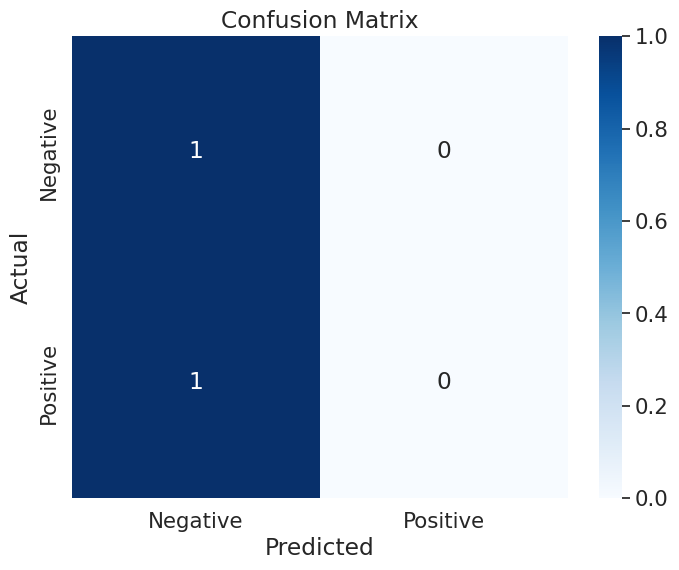

In [19]:
plot_confusion_matrix(cm, ["Negative","Positive"])

In [20]:
print (f"roc aur score: {roc_auc_score(df['target'], probs)}") # wecan conclude that a pre trained  sentment analysis model has achived high lavel of accuracy and  effectiveness so in predicting the sentiment labels "so this that the model is capable of accuracy classify text into positive or negative sentiment categories  "

roc aur score: 0.4199785307840589


In [21]:
# Text generation

poems = pd.read_csv("Robert_forst.csv")
poems.head(5)



,Name,Content,Collection,Year of Publication
0,NaN,NaN,NaN,NaN
1,Stopping by Woods on a Snowy Evening,Whose woods these are I think I know. \nHis ...,New Hampshire,1923.0
2,Fire and Ice,"Some say the world will end in fire,\nSome say...",New Hampshire,1923.0
3,The Aim was Song,Before man came to blow it right\nThe wind onc...,New Hampshire,1923.0
4,The Need of Being Versed in Country Things,The house had gone to bring again\nTo the midn...,New Hampshire,1923.0


In [22]:
content = poems["Content"].dropna().tolist()

In [23]:
lines =[]
for poem in content:
  for line in poem.split("\n"):
    lines.append(line.rstrip())

In [24]:
lines = [line for line in lines if len(line) >0]
lines[:5]

['Whose woods these are I think I know.',
 'His house is in the village though;',
 'He will not see me stopping here',
 'To watch his woods fill up with snow.',
 'My little horse must think it queer']

In [25]:
gen =  pipeline ("text-generation")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [26]:
lines[0]

'Whose woods these are I think I know.'

In [27]:
gen (lines[0],max_length = 20)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Whose woods these are I think I know. I can find plenty. You said your friends have'}]

In [28]:
gen(lines[1],max_length = 30, num_return_sequences = 2)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "His house is in the village though; the family has no friends; and yet I hope it will not take away my brother's name forever. He"},
 {'generated_text': "His house is in the village though; it's the main settlement. There's nothing to do here, except for playing and drinking with our friends."}]

In [29]:
import  textwrap
def wrap(x):
  return textwrap.fill(x, replace_whitespace = False,fix_sentence_ending=True)

In [30]:
# now we are seting the add tokens to your tokens so who thease are i think i know and this is the maximum 30 till 30
import textwrap

def wrap(x):
  return textwrap.fill(x, replace_whitespace=False)  # Remove the unsupported parameter

# now we are seting the add tokens to your tokens so who thease are i think i know and this is the maximum 30 till 30
out = gen(lines[0], max_length=30)
print(wrap(out[0]['generated_text']))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Whose woods these are I think I know. But the forest. The road? Those
trees. The forests. Where must they go? And what


In [34]:
promt =  "Transformers have a wide variet of application in nlp  "   #okay this my promt im mot import dataset
out = gen (promt, max_length = 100)
print (wrap(out[0]['generated_text']))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Transformers have a wide variet of application in nlp  , so having
more than one unit of  should make it easy to define a unit of  for
application. Let be a complex number with  = 18. There will be a
fixed number of elements of  within  = 4, depending on how you want
to compute the unit of  (since it will be a number
